In [1]:
# Import Required Libraries
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

2023-11-22 21:22:34.776906: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Check Tensorflow Version
import tensorflow
tensorflow.__version__

'2.9.1'

In [3]:
# Uncomment the following two lines if the data hasn't already been downloaded and unzipped
#!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
#!unzip data.zip

In [4]:
# Set up paths to training and test data
train_dir = './data/train'
test_dir = './data/test'

# You need to develop the model with following structure:

The shape for input should be (150, 150, 3) <br>
Next, create a convolutional layer (Conv2D):<br> 
Use 32 filters <br>
Kernel size should be (3, 3) (that's the size of the filter)<br>
Use 'relu' as activation<br>
Reduce the size of the feature map with max pooling (MaxPooling2D)<br>
Set the pooling size to (2, 2)<br>
Turn the multi-dimensional result into vectors using a Flatten layer<br>
Next, add a Dense layer with 64 neurons and 'relu' activation<br>
Finally, create the Dense layer with 1 neuron - this will be the output<br>
The output layer should have an activation - use the appropriate activation for the binary classification case<br>
As optimizer use SGD with the following parameters:

SGD(lr=0.002, momentum=0.8)

In [5]:
# Initialize Model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-11-22 21:22:36.503916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-22 21:22:36.510705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-22 21:22:36.510945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-22 21:22:36.511432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Question 1
Since we have a binary classification problem, what is the best loss function for us?

mean squared error <br>
binary crossentropy <br>
categorical crossentropy <br>
cosine similarity <br>
Note: since we specify an activation for the output layer, we don't need to set from_logits=True <br>



In [6]:
# Compile Model
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

Answer for Question 1: <b>binary_crossentropy.</b>

# Question 2
What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.

1 <br>
65 <br>
896 <br>
11214912 <br>

In [7]:
# SUMMARY:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Answer for Question 2: <b>896</b>

# Generators and Training
For the next two questions, use the following data generator for both train and test sets:

ImageDataGenerator(rescale=1./255) <br>
We don't need to do any additional pre-processing for the images. <br>
When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem? <br>
Use batch_size=20 <br>
Use shuffle=True for both training and test sets. <br>
For training use .fit() with the following params: <br>

model.fit( <br>
    train_generator, <br>
    epochs=10, <br>
    validation_data=test_generator <br>
) <br>

In [8]:
# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Training Data Generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [10]:
# Validation Data Generator
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        shuffle=True,
                                                        class_mode='binary')

Found 918 images belonging to 2 classes.


In [11]:
# Inspect Data & Labels Batch Shape
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10


2023-11-22 21:22:38.775615: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-22 21:22:39.403350: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-22 21:22:39.403809: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-22 21:22:39.403848: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-22 21:22:39.404413: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-22 21:22:39.404506: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 12s 50ms/step - loss: 0.6731 - acc: 0.5825 - val_loss: 0.6345 - val_acc: 0.5654
Epoch 2/10
184/184 [==============================] - 9s 49ms/step - loss: 0.6190 - acc: 0.6565 - val_loss: 0.5810 - val_acc: 0.7135
Epoch 3/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5716 - acc: 0.7104 - val_loss: 0.5784 - val_acc: 0.6808
Epoch 4/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5394 - acc: 0.7384 - val_loss: 0.5598 - val_acc: 0.6950
Epoch 5/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5062 - acc: 0.7672 - val_loss: 0.5216 - val_acc: 0.7527
Epoch 6/10
184/184 [==============================] - 9s 49ms/step - loss: 0.4779 - acc: 0.7803 - val_loss: 0.5150 - val_acc: 0.7549
Epoch 7/10
184/184 [==============================] - 9s 49ms/step - loss: 0.4506 - acc: 0.8026 - val_loss: 0.4943 - val_acc: 0.7810
Epoch 8/10
184/184 [==============================] - 9s 49ms/step - loss: 0.42

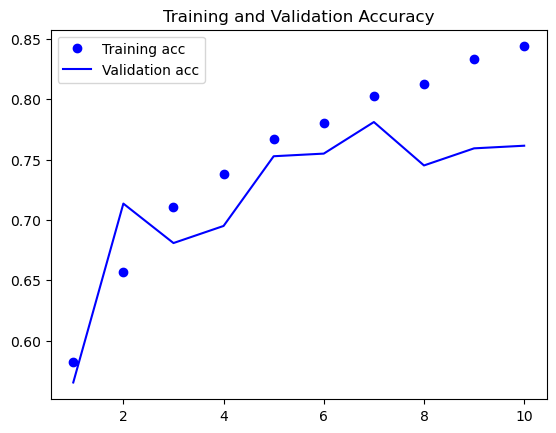

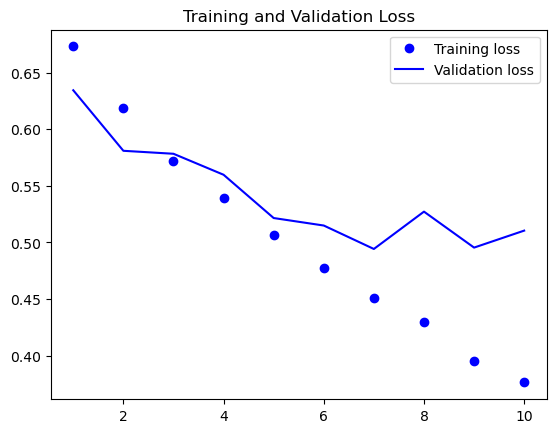

In [13]:
# Plot loss and accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Question 3
What is the median of training accuracy for all the epochs for this model?

0.20 <br>
0.40 <br>
0.60 <br>
0.80 <br>

In [14]:
# Compute Median Training Accuracy
acc_median = np.median(acc)
acc_median

0.7737285792827606

Answer for Question 3: <b>0.80</b>

# Question 4
What is the standard deviation of training loss for all the epochs for this model?

0.031 <br>
0.061 <br>
0.091 <br>
0.131 <br>

In [15]:
# Compute Standard Deviation of Loss
loss_std = np.std(loss)
loss_std

0.09212518606376388

Answer for Question 4: <b>0.091</b>

# Data Augmentation
For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

rotation_range=50, <br>
width_shift_range=0.1, <br>
height_shift_range=0.1, <br>
zoom_range=0.1, <br>
horizontal_flip=True, <br>
fill_mode='nearest' <br>

In [16]:
# Initialize Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

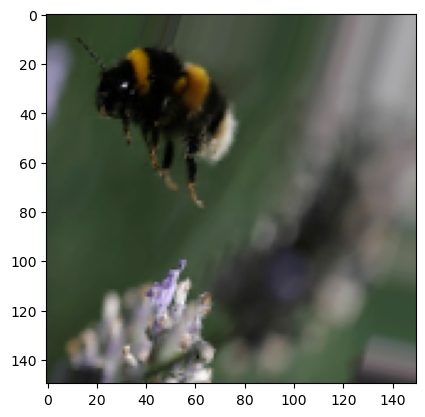

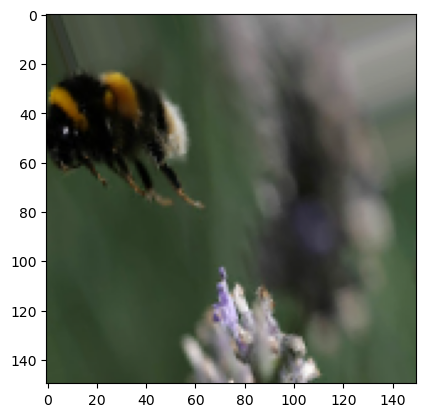

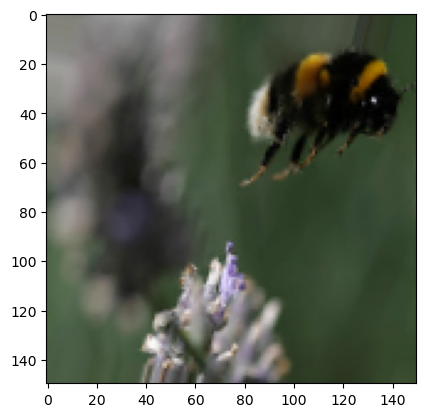

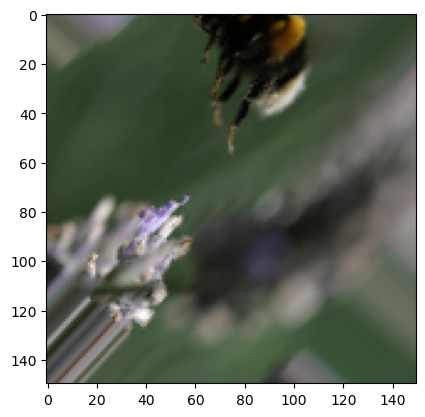

In [17]:
# Plot Input Images
fnames = [os.path.join(train_dir+"/bee", fname) for
    fname in os.listdir(train_dir+"/bee")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [18]:
# Training Data Generator
train_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
# Initialize Training Data Generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [21]:
# Initialize Validation Data Generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 918 images belonging to 2 classes.


# Question 5
Let's train our model for 10 more epochs using the same code as previously. <br>

Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

0.18 <br>
0.48 <br>
0.78 <br>
0.108 <br>

In [22]:
# Train Model With Augmented Data
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
115/115 [==============================] - 9s 79ms/step - loss: 0.3230 - acc: 0.8771 - val_loss: 0.4835 - val_acc: 0.7723
Epoch 2/10
115/115 [==============================] - 9s 78ms/step - loss: 0.3029 - acc: 0.8828 - val_loss: 0.5326 - val_acc: 0.7625
Epoch 3/10
115/115 [==============================] - 9s 78ms/step - loss: 0.2818 - acc: 0.8915 - val_loss: 0.4841 - val_acc: 0.7734
Epoch 4/10
115/115 [==============================] - 9s 78ms/step - loss: 0.2508 - acc: 0.9146 - val_loss: 0.4926 - val_acc: 0.7767
Epoch 5/10
115/115 [==============================] - 9s 77ms/step - loss: 0.2280 - acc: 0.9241 - val_loss: 0.4966 - val_acc: 0.7756
Epoch 6/10
115/115 [==============================] - 9s 79ms/step - loss: 0.2057 - acc: 0.9336 - val_loss: 0.5241 - val_acc: 0.7603
Epoch 7/10
115/115 [==============================] - 9s 79ms/step - loss: 0.1816 - acc: 0.9497 - val_loss: 0.5715 - val_acc: 0.7680
Epoch 8/10
115/115 [==============================] - 9s 79ms/step - 

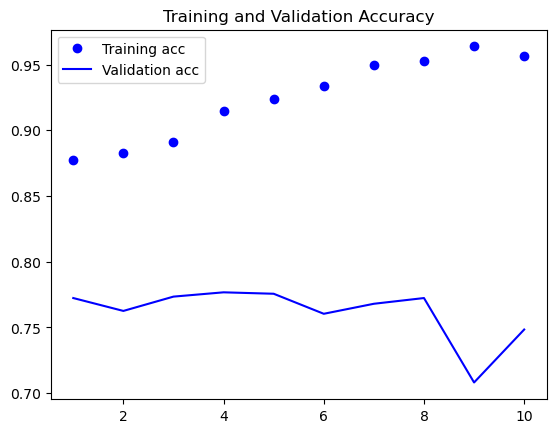

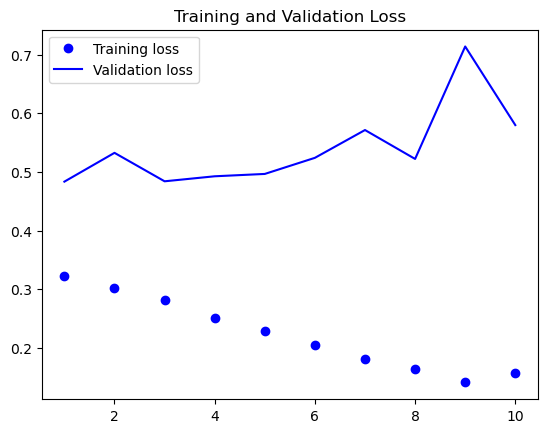

In [23]:
# Inspect Accuracy and Loss
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [24]:
# Compute Median of Loss
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.540111529827118

Answer for Question 5: <b>0.48<b/>

# Question 6
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

0.38 <br>
0.58 <br>
0.78 <br>
0.98 <br>

In [25]:
# Test Acccuracy In The Last 5 Epochs
val_acc_aug[5:10]

[0.7603485584259033,
 0.7679738402366638,
 0.772331178188324,
 0.7080609798431396,
 0.7483659982681274]

In [26]:
# Mean Test Acccuracy In The Last 5 Epochs
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7514161109924317

In [27]:
np.median(val_acc_aug[5:10])

0.7603485584259033

Answer for Question 6: <b>0.78</b>